  Activating project at `/gpfs/gibbs/project/eisaman/ka659/pinns-oceananigans-project/oceananigans/simulations`
   Resolving package versions...
  No Changes to `/gpfs/gibbs/project/eisaman/ka659/pinns-oceananigans-project/oceananigans/simulations/Project.toml`
  No Changes to `/gpfs/gibbs/project/eisaman/ka659/pinns-oceananigans-project/oceananigans/simulations/Manifest.toml`
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


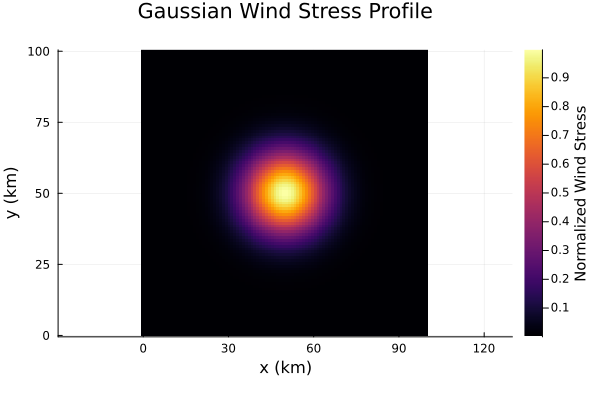

In [4]:
using Pkg
Pkg.activate(".")
Pkg.add("Plots")

using Plots

# Domain size and parameters
Lx = 100e3   # 100 km in meters
Ly = 100e3
σ = 10e3     # 10 km standard deviation
Nx = 100
Ny = 100

x = range(0, Lx, length=Nx)
y = range(0, Ly, length=Ny)
x₀ = Lx / 2
y₀ = Ly / 2

# Define the Gaussian wind stress function
gaussian_wind_stress(x, y) = exp(-((x - x₀)^2 + (y - y₀)^2) / (2 * σ^2))

# Compute wind stress values
Z = [gaussian_wind_stress(xi, yi) for yi in y, xi in x]  # note: row-major for Plots.jl

# Plot
heatmap(x ./ 1e3, y ./ 1e3, Z,
        xlabel = "x (km)", ylabel = "y (km)",
        title = "Gaussian Wind Stress Profile",
        colorbar_title = "Normalized Wind Stress",
        aspect_ratio = 1)
